MALLS DATA SET


DATA INGESTION


In [19]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [21]:
df=pd.read_csv("D:\ETL HIVE\datasets\Mall_Customers.csv")

In [22]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df.drop(["CustomerID"], axis=1, inplace=True)

rename columns


In [30]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income'}, inplace=True)


In [31]:
df.rename(columns={'Spending Score (1-100)': 'Spending Score'}, inplace=True)


In [32]:
df.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending Score'], dtype='object')

<AxesSubplot:xlabel='Spending Score', ylabel='Annual_Income'>

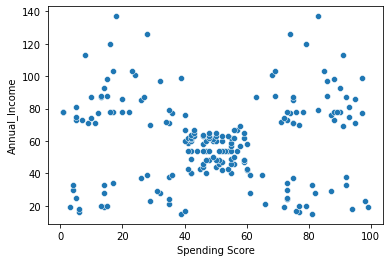

In [38]:
sns.scatterplot(data=df, x='Spending Score', y='Annual_Income')

In [52]:
x=df[['Spending Score', 'Annual_Income']]

Crate Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [44]:
num_pipeline= Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                               ('scaler', StandardScaler())])

In [53]:
x_scaled=num_pipeline.fit_transform(x)

kmeans clustering


In [47]:
from sklearn.cluster import KMeans

In [49]:
km= KMeans(n_clusters=5)

In [54]:
km.fit(x_scaled)

KMeans(n_clusters=5)

In [55]:
km.labels_


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [56]:
km.inertia_

65.56840815571682

In [58]:
intertia= []
for k in range(2,15):
    kmean= KMeans(k)
    kmean.fit(x)
    intertia.append(kmean.inertia_)
print(intertia)    


[183116.4295463669, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37233.81451071001, 30241.343617936585, 25018.576334776335, 21826.93630323165, 19634.55462934998, 17615.645251508537, 16077.48927791058, 14695.981427174976, 12738.826529894253]


In [61]:
plt.plot(range(2,15), intertia)

AttributeError: module 'matplotlib' has no attribute 'plot'

In [66]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [65]:
from yellowbrick.cluster.elbow import kelbow_visualizer